In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import scikitplot as skplt
import plotly.express as px
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [2]:
df = pd.read_excel("Geotechnic.xlsx")
df.head()

,Initial dry unit weight(kN/m3),Initial water content%,Pressure at wetting(kPa),LL%,Cu,Clay%,Silt%,Sand%,Collapsible potential Lable
0,13.64,4.9,100,22.6,16.7,12.0,75.0,13.0,14.1
1,14.72,4.9,100,22.6,16.7,12.0,75.0,13.0,8.1
2,15.60,4.9,100,22.6,16.7,12.0,75.0,13.0,4.2
3,16.48,4.9,100,22.6,16.7,12.0,75.0,13.0,3.9
4,14.62,5.3,200,22.6,16.7,12.0,75.0,13.0,11.6


In [3]:
# Data Cleaning Process
# We are checking how many rows of each feature is null or not defined

df.isnull().sum()

#If we had any null data and the number of null data was small compared to all data, we could use df.dropna()

Initial dry unit weight(kN/m3)    0
Initial water content%            0
Pressure at wetting(kPa)          0
LL%                               0
Cu                                0
Clay%                             0
Silt%                             0
Sand%                             0
Collapsible potential Lable       0
dtype: int64

In [4]:
X = df.drop('Collapsible potential Lable', axis = 'columns')
X.head()

,Initial dry unit weight(kN/m3),Initial water content%,Pressure at wetting(kPa),LL%,Cu,Clay%,Silt%,Sand%
0,13.64,4.9,100,22.6,16.7,12.0,75.0,13.0
1,14.72,4.9,100,22.6,16.7,12.0,75.0,13.0
2,15.60,4.9,100,22.6,16.7,12.0,75.0,13.0
3,16.48,4.9,100,22.6,16.7,12.0,75.0,13.0
4,14.62,5.3,200,22.6,16.7,12.0,75.0,13.0


In [5]:
y = df['Collapsible potential Lable']
y.head()

0    14.1
1     8.1
2     4.2
3     3.9
4    11.6
Name: Collapsible potential Lable, dtype: float64

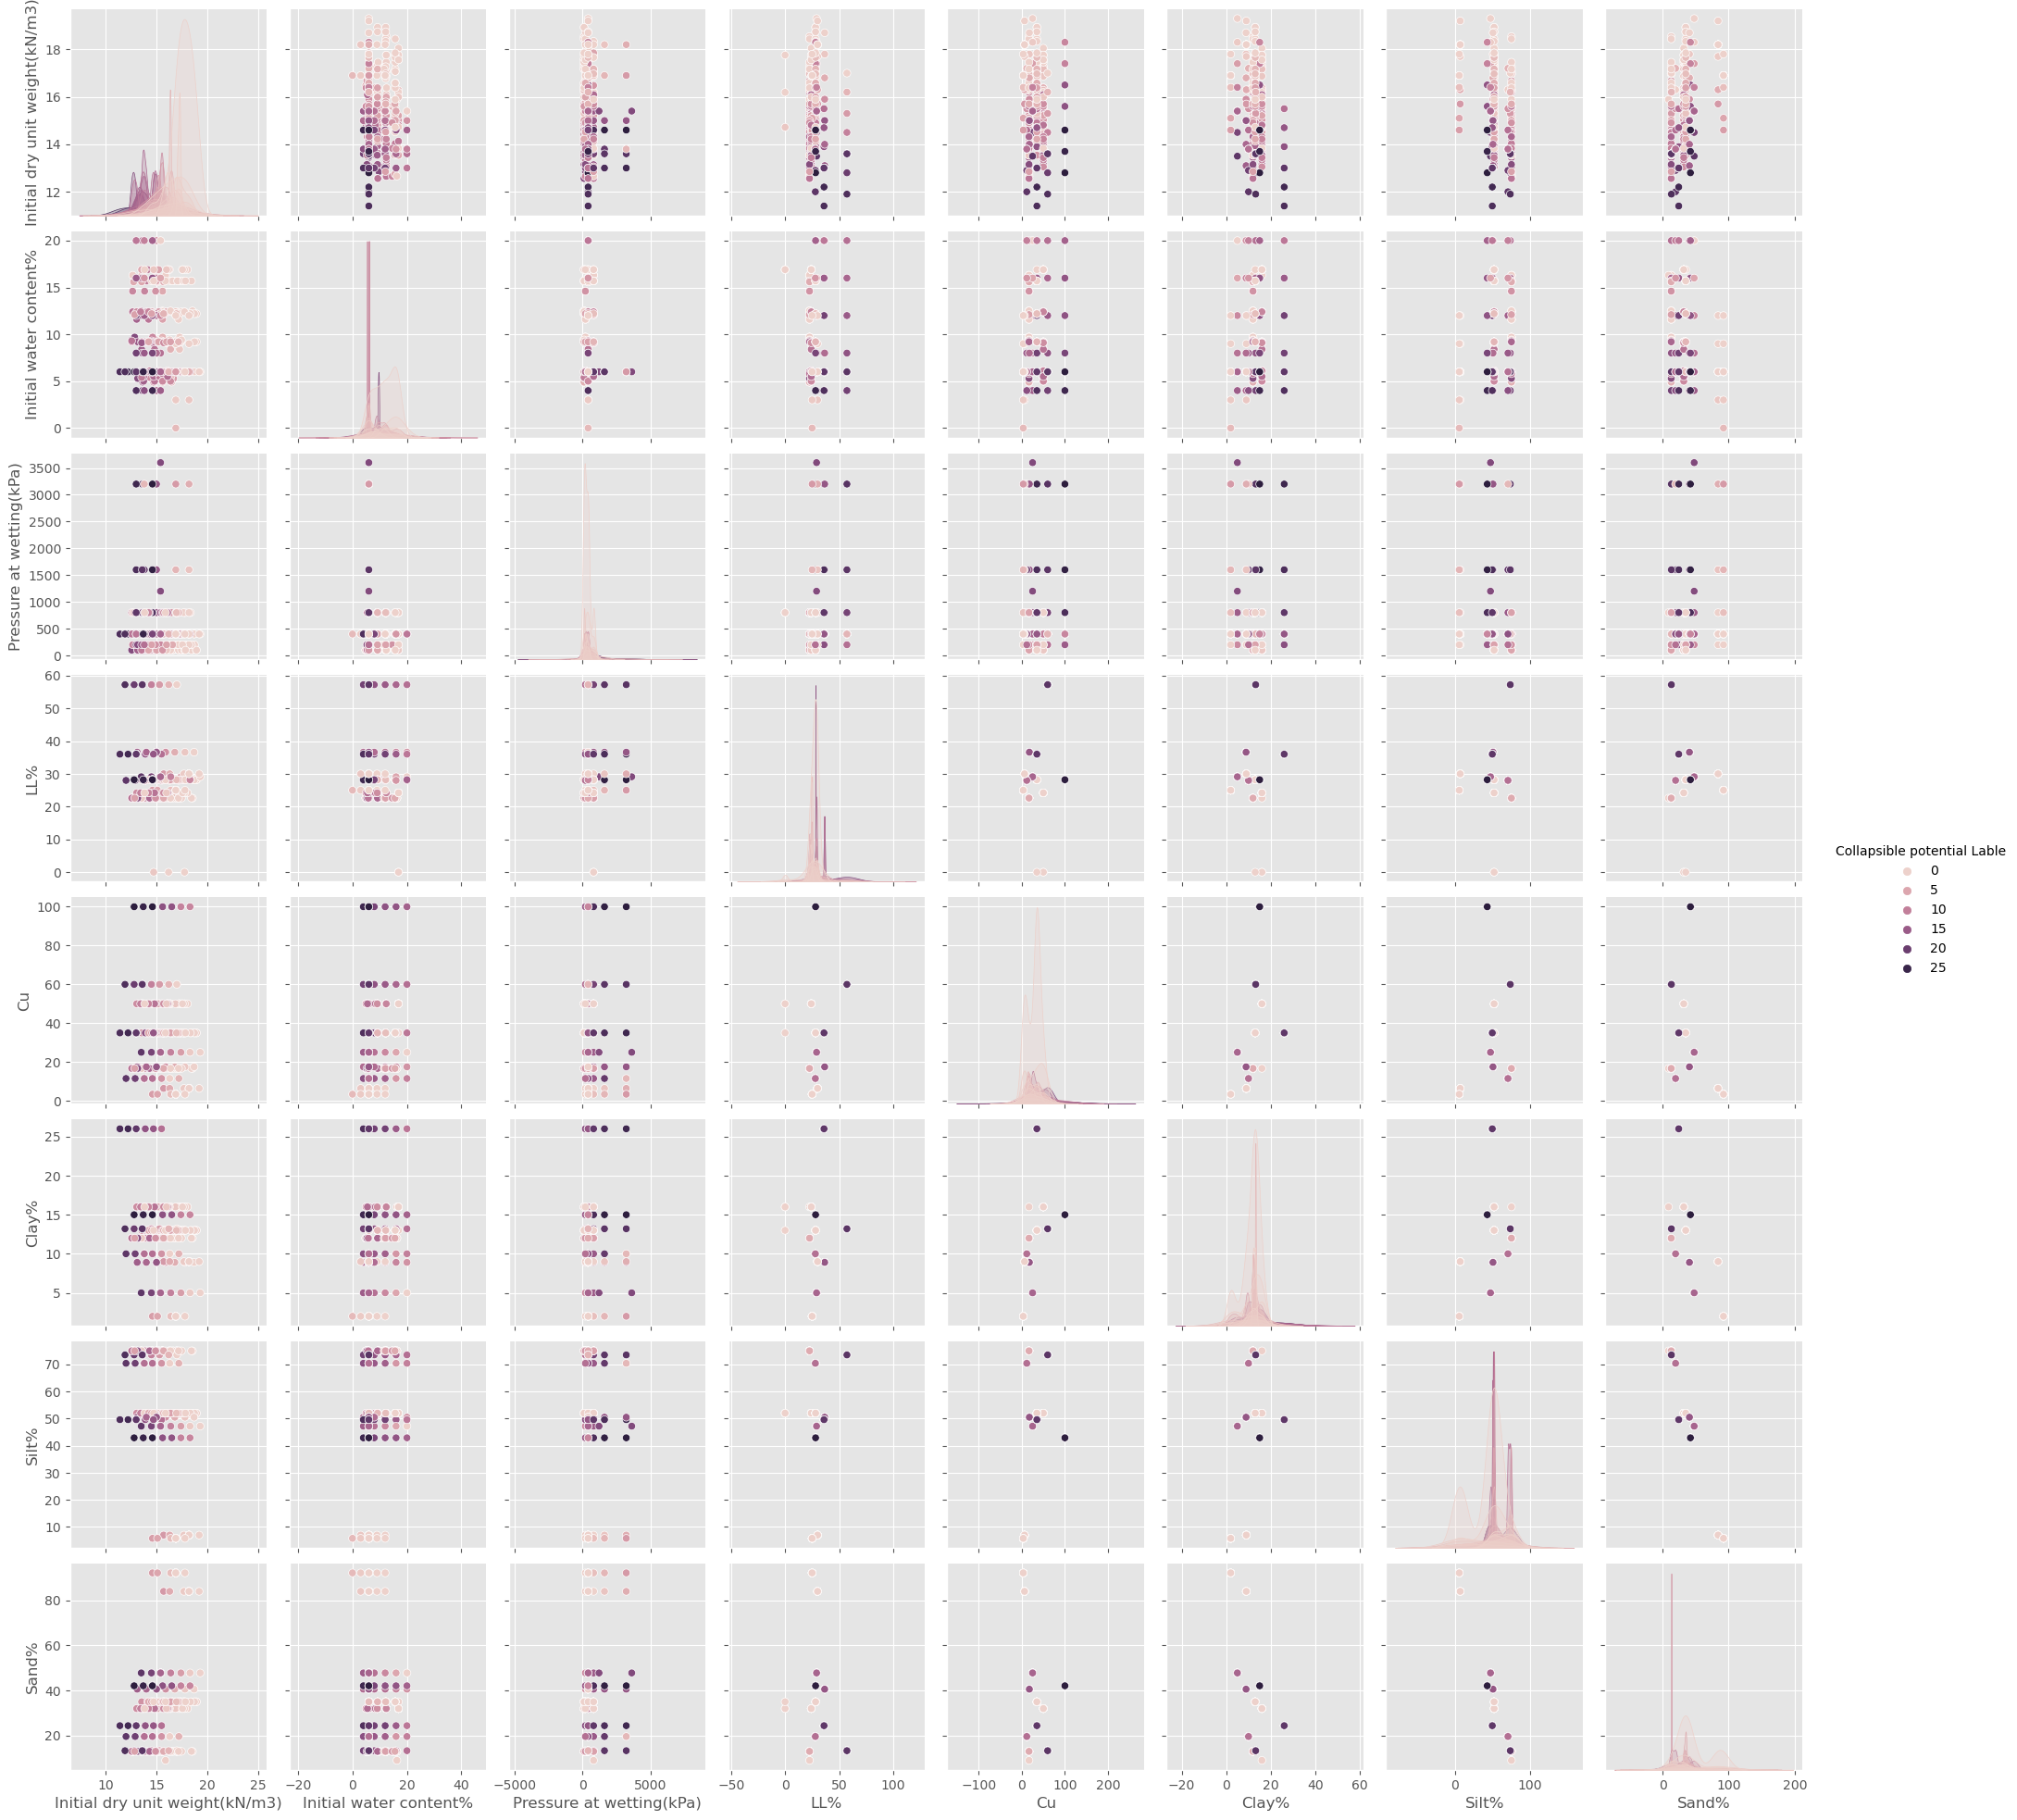

In [71]:
import seaborn as sns
sns.pairplot(df,hue='Collapsible potential Lable')

In [6]:
# We split train and test smaples (80% of the data is going to train the model and 20% of data is going to test the model)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [7]:
#First of All we test the score of a linear regression model to see if it's good as a model for our data based on its score

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

0.774859120023331

In [8]:
#To do a k-fold Cross Validation

#First we shuffle our dataset so each fold has equal distribution

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(lr_clf, X, y, cv=cv)

array([0.75353167, 0.73737043, 0.78252623, 0.80018747, 0.7305595 ])

In [9]:
from sklearn.inspection import permutation_importance

# Use trained model and data
result = permutation_importance(lr_clf, X_test, y_test, n_repeats=30, random_state=0)

# sorted_idx = result['importances_mean'].argsort()[::-1]
feature_names = ["Initial dry unit weight(kN/m3)", "Initial water content%", "Pressure at wetting(kPa)",
                  "LL%", "Cu", "Clay%", "Slit%", "Sand%"]

# for i, idx in enumerate(sorted_idx):
#     print(f"{feature_names[idx]:20}: {result['importances_mean'][idx]:.3f}")

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2*result.importances_std[i] > 0:
        print(f"{feature_names[i]:<30} : "
              f"{result.importances_mean[i]:.3f}"
              f" +/- {result.importances_std[i]:.3f}")

Initial dry unit weight(kN/m3) : 0.929 +/- 0.146
Initial water content%         : 0.225 +/- 0.058
Cu%                            : 0.142 +/- 0.032
Pressure at wetting(kPa)       : 0.036 +/- 0.016
LL%                            : 0.010 +/- 0.005


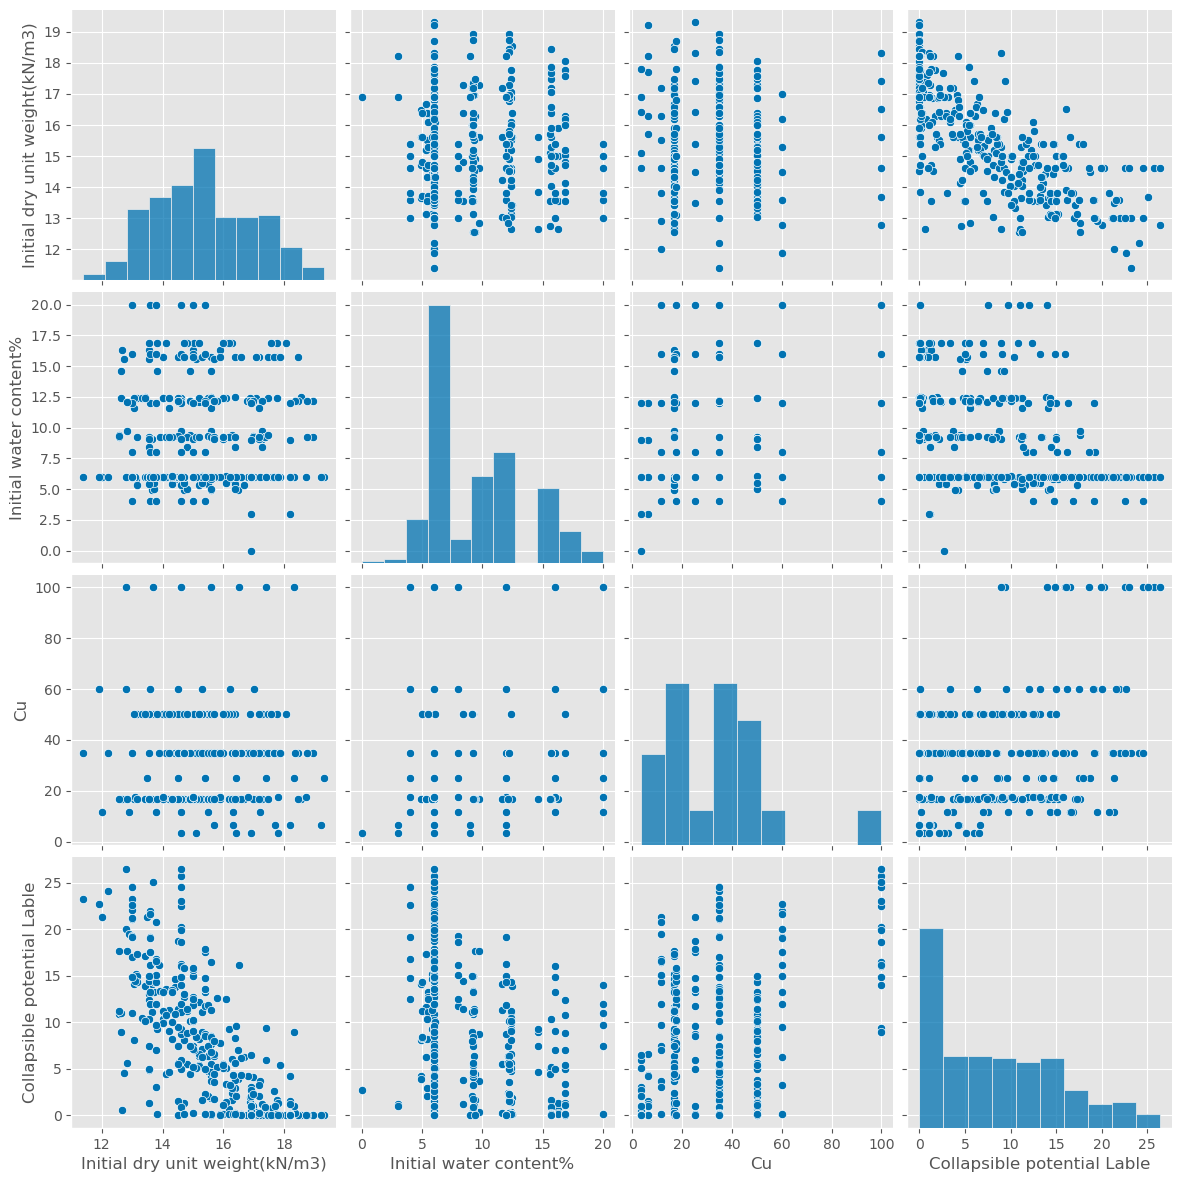

In [73]:
# Visualize the data using scatter plot and histogram of most important features
sns.set_palette('colorblind')
sns.pairplot(data=df[["Initial dry unit weight(kN/m3)", "Initial water content%", "Cu", 'Collapsible potential Lable']], height=3)

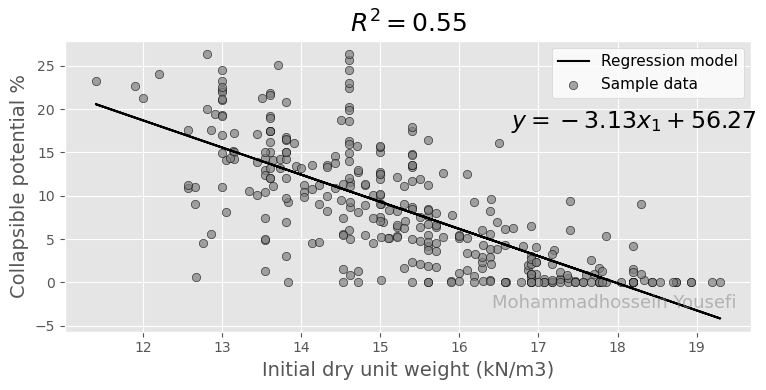

In [10]:
X_Ini_dry_unit = df['Initial dry unit weight(kN/m3)'].values.reshape(-1,1)
y_coll = y.values

lr_Ini_dry_unit = LinearRegression()
lr_Ini_dry_unit_model = lr_Ini_dry_unit.fit(X_Ini_dry_unit, y_coll)

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_Ini_dry_unit, lr_Ini_dry_unit_model.predict(X_Ini_dry_unit), color='k', label='Regression model')
ax.scatter(X_Ini_dry_unit, y_coll, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Collapsible potential %', fontsize=14)
ax.set_xlabel('Initial dry unit weight (kN/m3)', fontsize=14)
ax.text(0.8, 0.1, 'Mohammadhossein Yousefi', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)

ax.text(0.65, 0.7, '$y = %.2f x_1 + %.2f $' % (lr_Ini_dry_unit_model.coef_[0],
                                               abs(lr_Ini_dry_unit_model.intercept_)), fontsize=17, transform=ax.transAxes)

ax.set_title('$R^2= %.2f$' % lr_Ini_dry_unit_model.score(X_Ini_dry_unit, y_coll), fontsize=18)

fig.tight_layout()

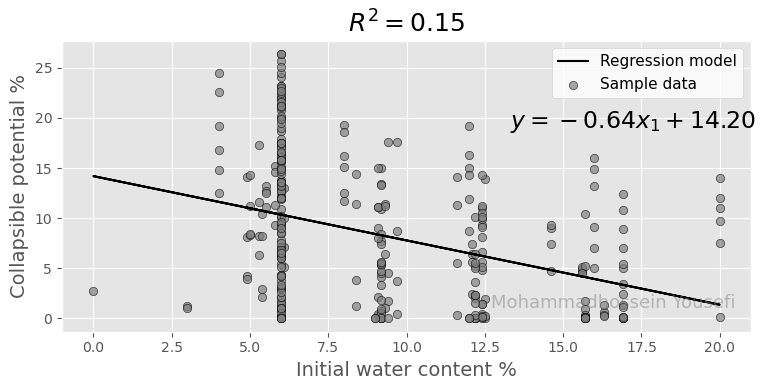

In [11]:
X_Ini_water_cont= df['Initial water content%'].values.reshape(-1,1)
y_coll = y.values

lr_Ini_water_cont = LinearRegression()
lr_Ini_water_cont_model = lr_Ini_water_cont.fit(X_Ini_water_cont, y_coll)

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_Ini_water_cont, lr_Ini_water_cont_model.predict(X_Ini_water_cont), color='k', label='Regression model')
ax.scatter(X_Ini_water_cont, y_coll, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Collapsible potential %', fontsize=14)
ax.set_xlabel('Initial water content %', fontsize=14)
ax.text(0.8, 0.1, 'Mohammadhossein Yousefi', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

ax.legend(facecolor='white', fontsize=11)
ax.text(0.65, 0.7, '$y = %.2f x_1 + %.2f $' % (lr_Ini_water_cont_model.coef_[0],
                                               abs(lr_Ini_water_cont_model.intercept_)), fontsize=17, transform=ax.transAxes)

ax.set_title('$R^2= %.2f$' % lr_Ini_water_cont_model.score(X_Ini_water_cont, y_coll), fontsize=18)

fig.tight_layout()

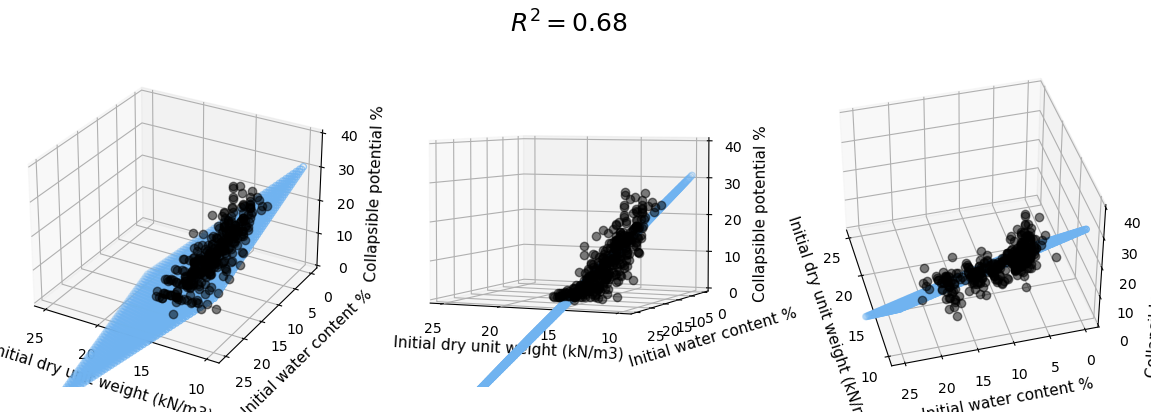

In [12]:
X_dry_unit_and_water_content = df[['Initial dry unit weight(kN/m3)', 'Initial water content%']].values.reshape(-1,2)

######################## Prepare model data point for visualization ###############################

x_1 = X_dry_unit_and_water_content[:, 0]
y_1 = X_dry_unit_and_water_content[:, 1]
z_1 = y_coll

x_pred = np.linspace(10, 25, 50)   # range of Initial dry unit weight
y_pred = np.linspace(0, 25, 50)  # range of Initial water content
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = LinearRegression()
model = ols.fit(X_dry_unit_and_water_content, y_coll)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X_dry_unit_and_water_content, y_coll)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x_1, y_1, z_1, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Initial dry unit weight (kN/m3)', fontsize=11)
    ax.set_ylabel('Initial water content %', fontsize=11)
    ax.set_zlabel('Collapsible potential %', fontsize=11)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    ax.set_zlim(0, 40)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=40, azim=165)


fig.suptitle('$R^2 = %.2f$' % r2, fontsize=18)

fig.tight_layout()

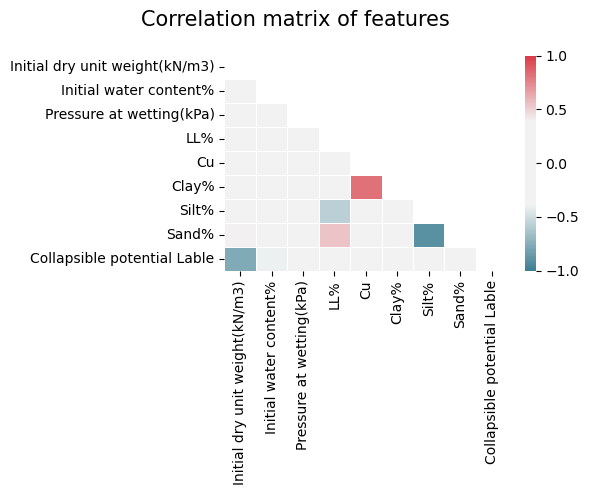

In [13]:
X_corr = X.iloc[:, :]

corr_heatmap = df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_heatmap, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_heatmap, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)

fig.tight_layout()

In [14]:
# We split train and test smaples (80% of the data is going to train the model and 20% of data is going to test the model)

X_train, X_test, y_train, y_test = train_test_split(X[['Initial dry unit weight(kN/m3)', 'Initial water content%', 'Cu']], y, test_size=0.2, random_state=10)

In [15]:
#First of All we test the score of a linear regression model to see if it's good as a model for our data based on its score

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

0.7405885270291105

In [16]:
Y_pred = lr_clf.predict(X_test)
Y_pred

array([-3.04850756e+00,  8.66777983e+00,  1.47262410e+01,  7.31430753e+00,
        4.07181653e+00,  6.18844430e+00, -5.79496050e-01,  3.71545078e-01,
        7.73545491e-01,  1.74042251e+01,  1.59899469e+01,  1.74042251e+01,
        1.02041854e+01,  1.52066133e+01,  6.31729272e+00,  1.16898507e+01,
        7.61279378e+00,  1.76926521e+01,  6.34214544e+00,  1.08301901e+01,
        3.32585794e+00,  1.01842672e+01,  8.80288445e+00,  1.15608123e+01,
        8.26471871e+00,  8.75501059e+00,  7.02813321e+00,  1.32867479e+01,
        1.50663366e+00,  3.21665997e+00,  3.60808058e+00,  1.25127721e+01,
        9.31782947e+00,  3.92383184e+00,  1.76926521e+01,  1.11786864e+01,
       -5.35573914e-01,  5.93388050e+00,  1.11757394e+01,  4.28229143e+00,
        1.18568748e+01, -2.07587095e+00,  3.53798115e+00,  9.59616205e+00,
        5.06310303e+00, -2.07587095e+00, -2.88493072e+00,  1.32432726e+01,
       -8.95558708e-03,  1.27654577e+01, -4.03771499e+00,  6.15544216e+00,
        8.81582754e+00,  

In [17]:
np.array(y_test)

array([ 0. ,  8. , 10. ,  9. ,  0.8,  7.7,  0. ,  0. ,  0. , 24.5, 15. ,
       21.1,  6. ,  8.2,  7. ,  8.1,  9.3, 17.5,  0. , 13.2,  9.1, 13.9,
        5.3, 12.5, 11.7,  5.1,  4.3, 19.2,  4.5,  5.1,  1.7, 13.4, 12.6,
        1.9, 21.9,  5.5,  0. ,  0.2, 16. ,  4.8,  7.1,  0. ,  0. ,  5.1,
        5.2,  0. ,  0. , 10.5,  0.3,  6.3,  0. ,  1.3, 12.5,  6.3, 16.1,
       18.7,  1. ,  2.4,  0. ,  0. , 19.2, 13.5,  4.1, 22.5, 14.9, 11.2])

In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred, squared=False))
print('R2 Score:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 2.8915656033209634
Mean Squared Error: 12.03620222729497
Root Mean Squared Error: 3.469323021469026
R2 Score: 0.7405885270291105


In [57]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridSearchCV(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha' : [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
             'model': DecisionTreeRegressor(),
             'params': {
                 'criterion': ['mse', 'friedman_mse'],
                 'splitter': ['best', 'random']
             }
        },
        'svr': {
            'model': SVR(),
            'params': {
                'C': [1, 10, 100, 1000],
                'gamma': [0.001, 0.0001],
                'kernel': ['linear']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [58]:
find_best_model_using_gridSearchCV(X[['Initial dry unit weight(kN/m3)', 'Initial water content%', 'Cu']],y)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklea

,model,best_score,best_params
0,linear_regression,0.722335,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.715243,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.641765,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,svr,0.720256,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}"


In [ ]:
X.shape, y.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

In [ ]:
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [65]:
s = SVR(gamma=0.001, C=100 ,kernel='linear')
s.fit(X_train,y_train)

SVR(C=100, gamma=0.001, kernel='linear')

In [66]:
#Making prediction on the test set
Y_pred_svr = s.predict(X_test)

In [67]:
Y_pred_svr

array([-2.79354828,  8.58153935, 14.55310437,  6.57693691,  3.70482499,
        6.27799603, -0.34535995,  0.72003393,  0.83835211, 17.40184034,
       16.11236802, 17.40184034, 10.22806855, 14.98767847,  7.01960552,
       11.56782121,  8.19594058, 17.52159633,  6.85391471, 11.31339495,
        3.90398865, 10.66093156,  8.83469331, 11.35383031,  8.2514019 ,
        8.73926254,  6.74198926, 13.67691951,  2.00698594,  3.76377704,
        3.22840706, 12.64603671,  9.09430277,  4.22928957, 17.52159633,
       11.16953205, -0.90497449,  5.78377682, 11.38590005,  4.58913279,
       11.60526846, -1.79921611,  3.37956088,  9.28273107,  5.24521791,
       -1.79921611, -3.24018801, 13.55999729,  0.1131768 , 12.45965588,
       -4.10448387,  6.65720207,  8.87054975,  5.48337357, 14.72198951,
       12.17289301,  3.37956088,  2.01212729, -0.73899597,  2.77458623,
       18.76323661, 12.07596387,  2.19866754, 17.59410143, 11.19363896,
       13.77697663])

In [68]:
np.array(y_test)

array([ 0. ,  8. , 10. ,  9. ,  0.8,  7.7,  0. ,  0. ,  0. , 24.5, 15. ,
       21.1,  6. ,  8.2,  7. ,  8.1,  9.3, 17.5,  0. , 13.2,  9.1, 13.9,
        5.3, 12.5, 11.7,  5.1,  4.3, 19.2,  4.5,  5.1,  1.7, 13.4, 12.6,
        1.9, 21.9,  5.5,  0. ,  0.2, 16. ,  4.8,  7.1,  0. ,  0. ,  5.1,
        5.2,  0. ,  0. , 10.5,  0.3,  6.3,  0. ,  1.3, 12.5,  6.3, 16.1,
       18.7,  1. ,  2.4,  0. ,  0. , 19.2, 13.5,  4.1, 22.5, 14.9, 11.2])

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_svr = mean_squared_error(y_test, Y_pred_svr)
mae_svr = mean_absolute_error(y_test, Y_pred_svr)
r2_svr = r2_score(y_test, Y_pred_svr)

print("\nSVR Results:")
print("Mean Squared Error (MSE):", mse_svr)
print("Mean Absolute Error (MAE):", mae_svr)
print("R-squared (R2) Score:", r2_svr)

X.shape, y.shape, Y_pred_svr.shape


SVR Results:
Mean Squared Error (MSE): 11.628724092280851
Mean Absolute Error (MAE): 2.8142443509314665
R-squared (R2) Score: 0.7493707409875743


((327, 8), (327,), (66,))

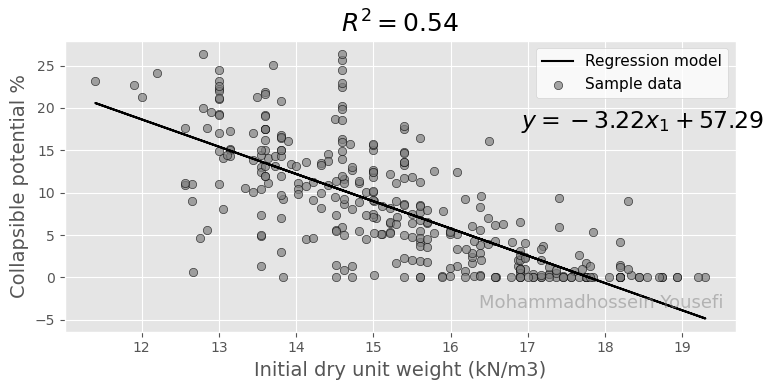

In [70]:
X_Ini_dry_unit_2 = df['Initial dry unit weight(kN/m3)'].values.reshape(-1,1)

lr_Ini_dry_unit_2 = s
lr_Ini_dry_unit_model_2 = lr_Ini_dry_unit_2.fit(X_Ini_dry_unit_2, y_coll)

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_Ini_dry_unit_2, lr_Ini_dry_unit_model_2.predict(X_Ini_dry_unit_2), color='k', label='Regression model')
ax.scatter(X_Ini_dry_unit_2, y_coll, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Collapsible potential %', fontsize=14)
ax.set_xlabel('Initial dry unit weight (kN/m3)', fontsize=14)
ax.text(0.8, 0.1, 'Mohammadhossein Yousefi', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)

ax.text(0.68, 0.7, '$y = %.2f x_1 + %.2f $' % (lr_Ini_dry_unit_model_2.coef_[0],
                                               abs(lr_Ini_dry_unit_model_2.intercept_)), fontsize=17, transform=ax.transAxes)

ax.set_title('$R^2= %.2f$' % lr_Ini_dry_unit_model_2.score(X_Ini_dry_unit_2, y_coll), fontsize=18)

fig.tight_layout()

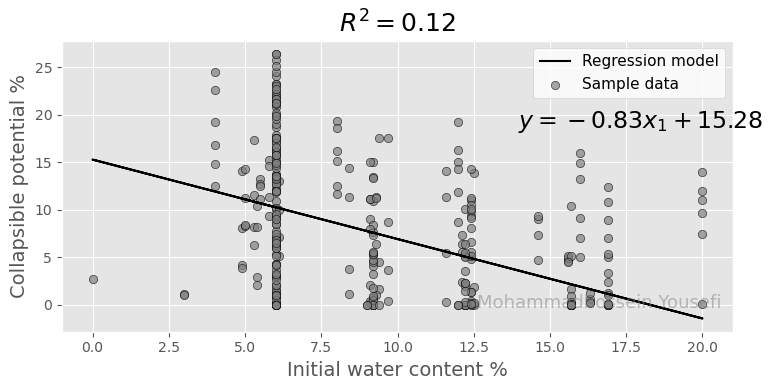

In [78]:
X_Ini_water_cont_2 = df['Initial water content%'].values.reshape(-1,1)

lr_Ini_water_cont_2 = s
lr_Ini_water_cont_model_2 = lr_Ini_water_cont_2.fit(X_Ini_water_cont_2, y_coll)

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_Ini_water_cont_2, lr_Ini_water_cont_model_2.predict(X_Ini_water_cont_2), color='k', label='Regression model')
ax.scatter(X_Ini_water_cont_2, y_coll, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Collapsible potential %', fontsize=14)
ax.set_xlabel('Initial water content %', fontsize=14)
ax.text(0.8, 0.1, 'Mohammadhossein Yousefi', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)

ax.text(0.68, 0.7, '$y = %.2f x_1 + %.2f $' % (lr_Ini_water_cont_model_2.coef_[0],
                                               abs(lr_Ini_water_cont_model_2.intercept_)), fontsize=17, transform=ax.transAxes)

ax.set_title('$R^2= %.2f$' % lr_Ini_water_cont_model_2.score(X_Ini_water_cont_2, y_coll), fontsize=18)

fig.tight_layout()

In [75]:
#Statistical validation metrics

import statsmodels.api as sm

X_validation = X[['Initial dry unit weight(kN/m3)', 'Initial water content%', 'Cu']]
X_validation = sm.add_constant(X_validation) # adding a constant

olsmod = sm.OLS(df['Collapsible potential Lable'], X_validation).fit()
print(olsmod.summary())

                                 OLS Regression Results                                
Dep. Variable:     Collapsible potential Lable   R-squared:                       0.750
Model:                                     OLS   Adj. R-squared:                  0.748
Method:                          Least Squares   F-statistic:                     323.2
Date:                         Sat, 10 Feb 2024   Prob (F-statistic):           6.73e-97
Time:                                 10:03:44   Log-Likelihood:                -874.18
No. Observations:                          327   AIC:                             1756.
Df Residuals:                              323   BIC:                             1772.
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [81]:
#An example of our prediction

lr_clf.predict([[16.4, 6.2, 17]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.95283239])

### F-test or ANOVA

F-test or ANOVA (Analysis of variance) in multi-linear regression can be used to determine whether our complex model perform better than a simpler model (e.g. model with only one independent variable). With F-test we can evaluate the significance of our model by calculating the probability of observing an F-statistic that is at least as high as the value that our model obtained. Similar to R² score, we can easily get the F-statistic and probability of said F-statistic by accessing the .fvalues and .f_pvalues attribute of our model as below.

In [90]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 323.2124604778448
Probability of observing value at least as high as F-statistic: 6.734059896450969e-97


Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

### T-test

The t-statistic is the coefficient divided by its standard error. The standard error is an estimate of the standard deviation of the coefficient, the amount it varies across cases. It can be thought of as a measure of the precision with which the regression coefficient is measured. Same as the F-test, the p-value show the probability of seeing a result as extreme as the one our model have. We can also get the p-value for all of our variables by calling the .pvalues attribute on the model.

In [91]:
print(olsmod.pvalues)

const                             1.111443e-91
Initial dry unit weight(kN/m3)    8.466757e-76
Initial water content%            2.076550e-34
Cu                                2.797626e-18
dtype: float64


All of our independent variables have p-value less than 0.05 which shows that there is sufficient evidence that Initial dry unit, Initial water content, and Cu affects our Collapsible potential.